# Cookie Cats에서 A/B실험 데이터를 포함한 데이터 셋
게임 첫 관문이 30이였을 때와 40 이였을 때의 이탈율의 변화가 있는지에 대한 테스트 결과

Cookie Cats게임 : 모바일 캐쥬얼 퍼즐 게임

모바일 퍼즐 게임의 특징 
1) 조작 방식이 간단하고 짧은 플레이 타임이 특징인 게임
2) 클리어할 때 성취감을 느끼고 스트레스 해소에 도움이 된다.
3) 짧은 플레이 타임으로 얼마 안한거 같지만 시간이 많이 지나있을 때가 많다.

제가 생각하는 테스트 결과

1) 첫 관문이 30일 때보다 40일 때가 1,7일차 모두 잔존율은 높지만 첫날하고 안들어온 비율도 높을것이다.
2) 게이트 30시작 유저가 평균 판 수가 더 높을 것이다.

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [10]:
user_1 = pd.read_csv('cookie_cats.csv')

In [3]:
user_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


userid : 유저의 ID  
version : 게임 첫 시작했을 때의 버전  
sum_gamerounds : 게임을 몇판 했는가  
retention_1 : 게임을 시작한 다음 날에도 접속을 했는가  
retention_7 : 게임을 시작한 7일 뒤에 접속을 했는가  

In [4]:
user_1['sum_gamerounds'].describe()
# 최댓값 49854게임이 1주일내로 시간상 불가능할 것 같음.
# 0인유저들은 게임을 하지 않았기 때문에 제외

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

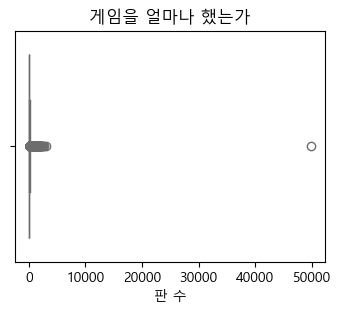

In [5]:
# Boxplot으로 이상치 확인
plt.figure(figsize=(4,3))
sns.boxplot(x=user_1['sum_gamerounds'], color='salmon')
plt.title('게임을 얼마나 했는가')
plt.xlabel('판 수')
plt.show()

#49854판을 한다는 것은 이상하다 판단.

In [6]:
# 이상치 제거
user_2 = user_1.drop(user_1[user_1['sum_gamerounds']==49854].index,axis=0)

## 1. 게이트30에서 시작한 유저가 평균 판 수가 더 높을 것이다.

In [7]:
# 게임 판수가 0인 유저의 데이터 필요 X
user_3 = user_2.drop(user_1[user_1['sum_gamerounds']==0].index,axis=0)

In [8]:
user_3['sum_gamerounds'].describe()
# 90189개의 데이터에서 86194개의 데이터로 축소

count    86194.000000
mean        53.698297
std        104.425174
min          1.000000
25%          6.000000
50%         18.000000
75%         54.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

In [9]:
version_30 = user_3[user_3['version']=='gate_30']
version_40 = user_3[user_3['version']=='gate_40']

In [10]:
version_30

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
13,2179,gate_30,39,True,False
14,2218,gate_30,305,True,True
15,2382,gate_30,73,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


In [11]:
version_40

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False
...,...,...,...,...,...
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False


In [12]:
version_30['sum_gamerounds'].describe()

count    42762.000000
mean        53.667766
std        103.743691
min          1.000000
25%          6.000000
50%         18.000000
75%         53.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

In [13]:
version_40['sum_gamerounds'].describe()

count    43432.000000
mean        53.728357
std        105.093012
min          1.000000
25%          6.000000
50%         18.000000
75%         55.000000
max       2640.000000
Name: sum_gamerounds, dtype: float64

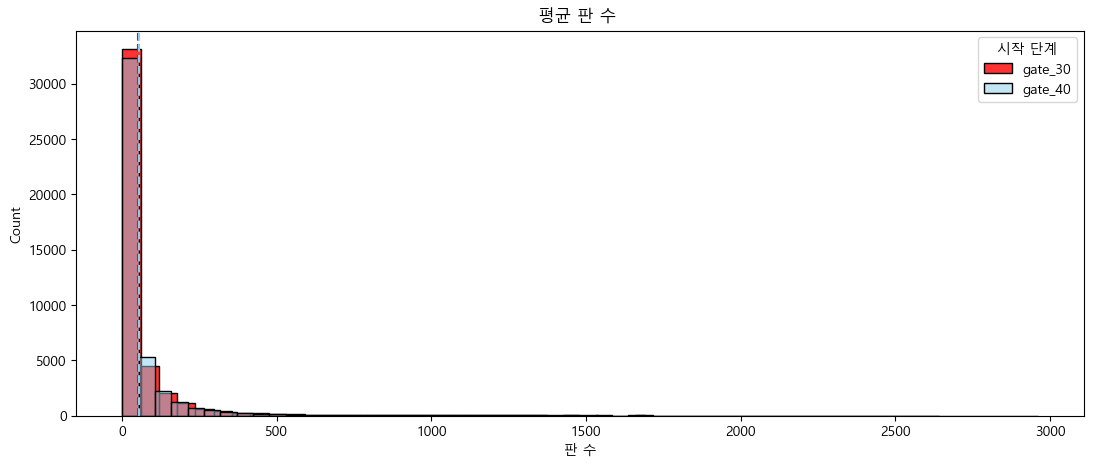

In [14]:
v30_mean = version_30['sum_gamerounds'].mean()
v40_mean = version_40['sum_gamerounds'].mean()

#히스토 그램 확인
plt.figure(figsize=(13,5))
sns.histplot(version_30['sum_gamerounds'], bins=50, color='red', alpha=0.8, label='gate_30')
sns.histplot(version_40['sum_gamerounds'], bins=50, color='skyblue', alpha=0.5, label='gate_40')
#평균선
plt.axvline(v30_mean, color='red', linestyle='--')
plt.axvline(v40_mean, color='skyblue', linestyle='--')


plt.title('평균 판 수 ')
plt.xlabel('판 수')
plt.legend(title="시작 단계")
plt.show()

#평균선은 겹쳐 있는 걸로 봐선 비슷하다.

In [15]:
# T-test
t_stat, p_value = ttest_ind(version_30['sum_gamerounds'], version_40['sum_gamerounds'], equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# T-statistic: -0.0852 --> 40시작 유저가 30유저 보다 판 수가 더 많음.
# P-value > 0.05 --> 통계적으로 유의미하게 다르지 않다.

# 게이트 30시작 유저가 평균 판 수가 더 높을 것이다. << 귀무가설 기각할 수 없음

T-statistic: -0.0852
P-value: 0.9321


## 2. 첫 관문이 30일 때보다 40시작일 때가 1,7일차 모두 잔존율은 높을것이다.

In [16]:
# 1일차 7일차 잔존율 확인하기위해
user_4 = user_2.copy()
user_4["retention_total"] = user_2["retention_1"].astype(str) + "_" + user_2["retention_7"].astype(str)

In [17]:
user_4

,userid,version,sum_gamerounds,retention_1,retention_7,retention_total
0,116,gate_30,3,False,False,False_False
1,337,gate_30,38,True,False,True_False
2,377,gate_40,165,True,False,True_False
3,483,gate_40,1,False,False,False_False
4,488,gate_40,179,True,True,True_True
...,...,...,...,...,...,...
90184,9999441,gate_40,97,True,False,True_False
90185,9999479,gate_40,30,False,False,False_False
90186,9999710,gate_30,28,True,False,True_False
90187,9999768,gate_40,51,True,False,True_False


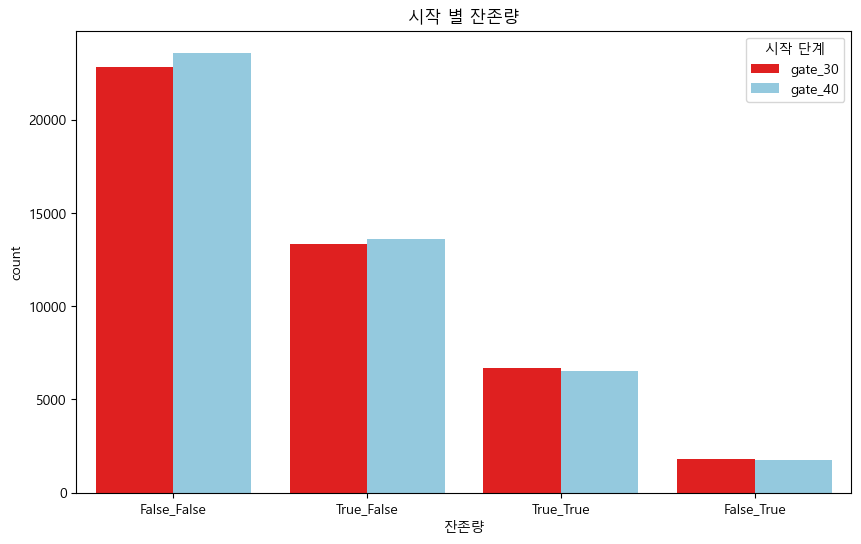

In [18]:
color = {"gate_30": "red", "gate_40": "skyblue"}

plt.figure(figsize=(10,6))
sns.countplot(data=user_4, x="retention_total", hue="version", palette = color )
plt.title("시작 별 잔존량")
plt.xlabel("잔존량")
plt.legend(title="시작 단계")
plt.show()

In [19]:
# 카이제곱 검정
contingency_tt = pd.crosstab(user_4["version"], user_4["retention_total"] == "True_True")
chi2_tt, p_tt, dof_tt, expected_tt = chi2_contingency(contingency_tt)
print(f"Chi2={chi2_tt:.4f}, p={p_tt:.4f}")

# p-value(0.0073) < 0.05 --> 통계적으로 유의미하다
#1,7일차 모두 잔존율이 높을 것이다. << 귀무가설 기각한다.

Chi2=7.1902, p=0.0073


In [20]:
contingency_ff = pd.crosstab(user_4["version"], user_4["retention_total"] == "False_False")
chi2_ff, p_ff, dof_ff, expected_ff = chi2_contingency(contingency_ff)
print(f"Chi2={chi2_ff:.4f}, p={p_ff:.4f}")

# p-value(0.0073) < 0.05 --> 통계적으로 유의미하다

Chi2=5.4146, p=0.0200
